In [1]:
 import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (15,9)
plt.rcParams['font.size'] = 15

In [2]:
df = pd.read_csv('2004ty16LC-data.csv')
data = np.loadtxt('diff_magnitudes.txt')
times = np.loadtxt('times.txt')

In [3]:
times

array([  0.,   2.,   3.,   5.,   7.,   8.,   9.,  10.,  11.,  13.,  14.,
        15.,  16.,  17.,  19.,  20.,  21.,  22.,  23.,  24.,  26.,  27.,
        28.,  29.,  30.,  32.,  33.,  34.,  35.,  36.,  38.,  39.,  40.,
        41.,  42.,  44.,  45.,  46.,  47.,  48.,  50.,  51.,  47.,  48.,
        49.,  51.,  52.,  53.,  54.,  55.,  57.,  58.,  59.,  60.,  61.,
        63.,  64.,  65.,  66.,  67.,  69.,  70.,  71.,  75.,  77.,  78.,
        79.,  80.,  82.,  83.,  84.,  85.,  86.,  88.,  89.,  90.,  91.,
        92.,  94.,  95.,  96.,  97.,  98., 100., 101., 102., 103., 104.,
       106., 107., 108., 109., 110., 111., 113., 114., 115., 116., 117.,
       119., 120., 121., 122., 123., 125., 126., 127., 128., 129., 131.,
       132., 133., 134., 135.])

In [4]:
col_list = list(df)
col_list[0], col_list[1] = col_list[1], col_list[0]
df.columns = col_list
df.rename(columns={"y": "x", "x": "y"}, inplace=True)

In [5]:
mags = data[:,0]
mags_err = data[:,1]

In [6]:
#removing noise
where_noisy = np.where((mags >= 0.15) | (mags <= 0.05))
newy = np.delete(mags, where_noisy)
newy_err = np.delete(mags_err, where_noisy)
newt = np.delete(times, where_noisy)

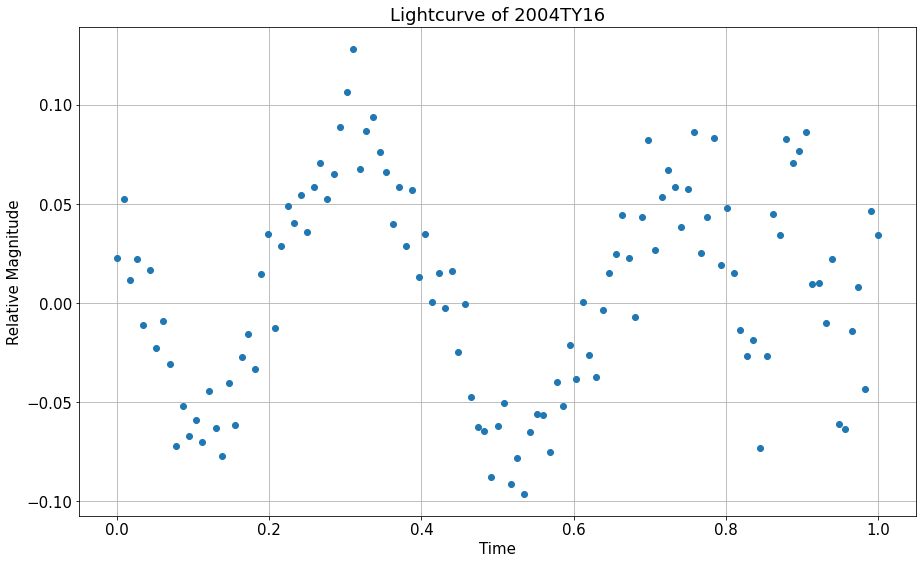

In [7]:
N = len(df['x']) 
tp = np.linspace(0, 1, N)
yp = df['y']

guess_freq = 2*np.pi/0.4
guess_amplitude = 3*np.std(yp)/(2**0.5)
guess_phase = 0
guess_offset = np.mean(yp)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

def sinfunc(x, f, A, p, off):
    return np.sin(x * f + p) * A + off

popt, pcov = curve_fit(sinfunc, tp, yp, p0=p0, method='trf')

y_guess = sinfunc(tp, *p0)

fit = sinfunc(tp, *popt)

plt.plot(tp, yp, 'o', label = 'Data')
#plt.plot(tp, fit, label='Least-Square Fit')
#plt.axvline(x = 2*np.pi/popt[0], c = 'r', label = 'P') #period = 2pi / freq
#plt.axvline(x = 4*np.pi/popt[0], c = 'g', label = '2P')
plt.title('Lightcurve of 2004TY16')
plt.xlabel('Time')
plt.ylabel('Relative Magnitude');
#plt.plot(t, y_guess, label='first guess')
#plt.legend(loc = 'upper left');

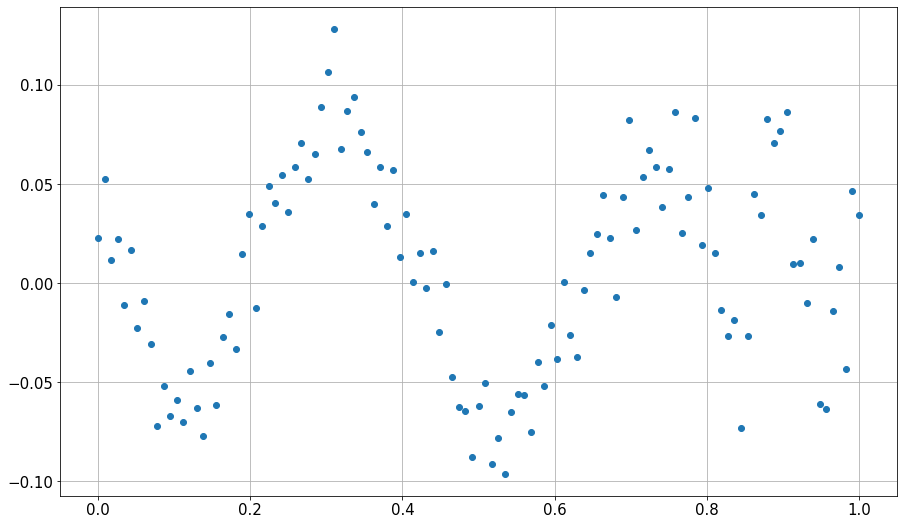

In [8]:
z = np.polyfit(tp, yp, 6)
p = np.poly1d(z)
#plt.plot(tp, p(tp))
plt.plot(tp,yp,'o')

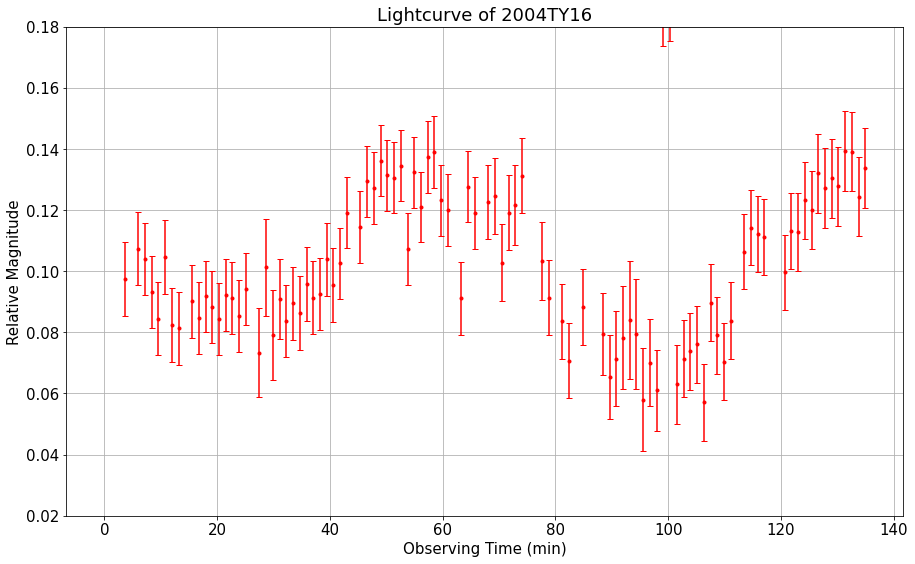

In [9]:
N = len(mags) 
#t = df['x']*4*np.pi
t1 = np.linspace(0,135,len(mags))
y1 = mags

guess_freq = 2*np.pi/0.6
guess_amplitude = -3*np.std(y1)/(2**0.5)
guess_phase = 0
guess_offset = np.mean(y1)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

def sinfunc(x, f, A, p, off):
    return np.sin(x * f + p) * A + off

popt, pcov = curve_fit(sinfunc, t1, y1, p0=p0)

y_guess = sinfunc(t1, *p0)

fit1 = sinfunc(t1, *popt)

plt.errorbar(t1, y1, yerr = mags_err, fmt = '.', color = 'red', label = 'Observations', barsabove=True, capsize=3)
#plt.plot(t1, fit1, label = 'Least-Square Fit')
#plt.plot(t, y_guess, label = 'Guess Fit')
plt.title('Lightcurve of 2004TY16')
plt.xlabel('Observing Time (min)')
plt.ylabel('Relative Magnitude')
plt.ylim((0.02,0.18));
#plt.legend();

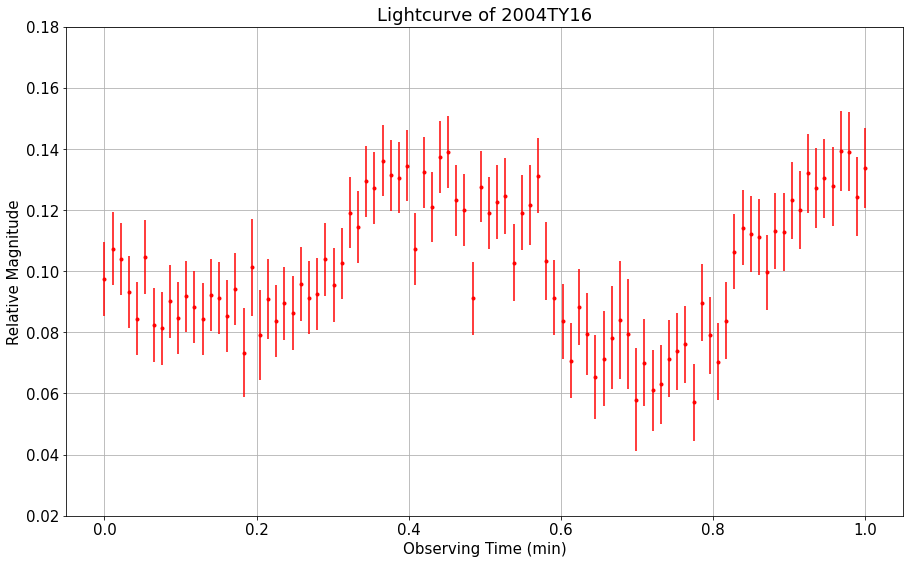

In [13]:
#plot with noise removed

y2 = newy
t2 = np.linspace(0,1,len(newy))

guess_freq = 2*np.pi/0.6
guess_amplitude = -3*np.std(y2)/(2**0.5)
guess_phase = newy[0]
guess_offset = np.mean(y2)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

def sinfunc(x, f, A, p, off):
    return np.sin(x * f + p) * A + off

popt, pcov = curve_fit(sinfunc, t2, newy, p0=p0)

y_guess = sinfunc(t2, *p0)

fit2 = sinfunc(t2, *popt)

plt.errorbar(t2, y2, yerr = newy_err, fmt = '.', color = 'r', label = 'Observations', barsabove = True)
#plt.plot(t2, fit2, label = 'Least-Square Fit')
#plt.plot(t, y_guess, label = 'Guess Fit')
plt.title('Lightcurve of 2004TY16')
plt.xlabel('Observing Time (min)')
plt.ylabel('Relative Magnitude')
plt.ylim((0.02,0.18));

In [11]:
where_slice = np.where(tp <= 135/167.7)
yslice = yp[where_slice[0]]
td = np.linspace(0, 135/167.7, len(y2))

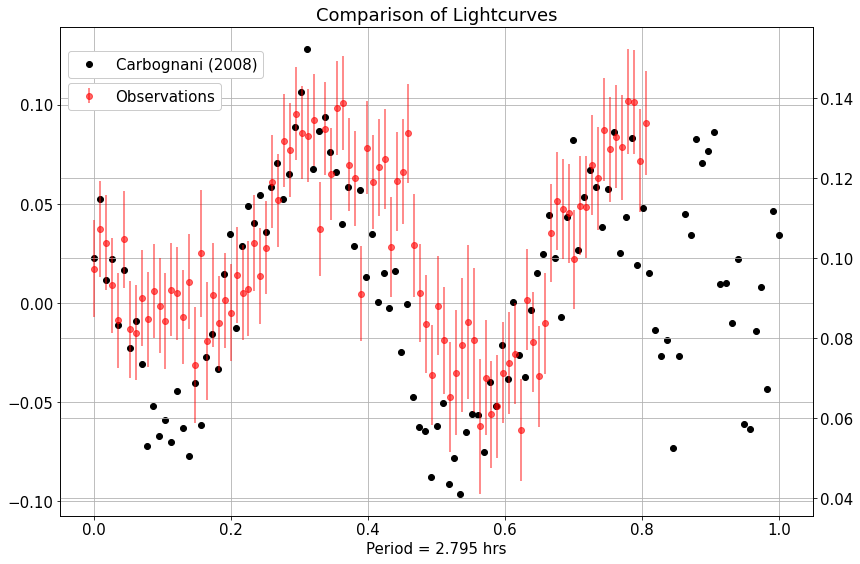

In [12]:
fig, ax = plt.subplots()
axes = [ax, ax.twinx()]

axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

axes[0].plot(tp, yp, 'o', color = 'black', label = 'Carbognani (2008)')
axes[1].errorbar(td, y2, fmt = 'o', yerr = newy_err, color = 'red', label = 'Observations', alpha=0.6)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

axes[0].legend(loc='upper left', bbox_to_anchor=(0.0, 0.965), framealpha = 1)
axes[1].legend(loc='upper left', bbox_to_anchor=(0.0, 0.9), framealpha=1)

plt.title('Comparison of Lightcurves')
ax.set_xlabel('Period = 2.795 hrs');